In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

features, labels = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=18)

print("Amostras: " , features.shape)
print("Classes: ", np.unique(labels))

Amostras:  (1000, 2)
Classes:  [0 1]


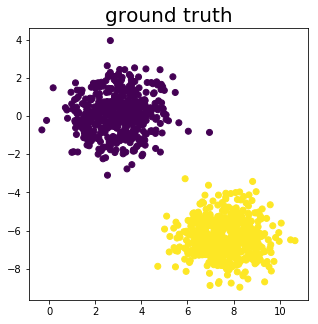

In [70]:
figure, subfig = plt.subplots(1, 1, figsize=(5, 5))
subfig.scatter(features[:, 0], features[:, 1], c=labels)
subfig.set_title('ground truth', fontsize=20)
plt.show()

In [71]:
bias = np.ones(features.shape[0])
bias.shape = (bias.size, 1)
features = np.concatenate((bias, features), axis = 1)
features

array([[ 1.        ,  6.50991327, -5.41636781],
       [ 1.        ,  2.4501235 , -0.59938532],
       [ 1.        ,  2.66112728, -1.20982319],
       ...,
       [ 1.        ,  2.68725506, -0.05088703],
       [ 1.        ,  7.28854525, -5.41593436],
       [ 1.        ,  7.90523134, -5.19417784]])

In [101]:
x = np.array(features)
y = np.array(labels)

x.tolist()
y.tolist()

x[100]


array([ 1.        ,  1.71186878, -0.67180008])

In [103]:
def train_perceptron(features, labels, threshold, lrate, epochs):
    w = np.zeros(len(features[0]))
    nepoch = 0
    
    g_vec = np.ones(len(labels))
    errors = np.ones(len(labels))
    cost = []
    
    while nepoch < epochs:
        for i in range(0, len(labels)):
            f = np.dot(w, features[i])
            if f >= threshold:
                g = 1
            else:
                g = 0
            g_vec[i] = g
            
            for j in range(0, len(w)):
                w[j] += lrate * (labels[i] - g) * features[i][j]
            
            nepoch += 1
            
        for i in range(0, len(labels)):
            errors[i] = (labels[i] - g_vec[i]) ** 2
        
        cost.append(0.5 * np.sum(errors))
    
    return w, cost

In [104]:
result = train_perceptron(x, y, 1, 0.01, 100)
print("Size the features: " + str(len(x)) + " and labels: " + str(len(y)))
print("The weights are: ", result[0])
print("The errors are: ", result[1])

Size the features: 1000 and labels: 1000
The weights are:  [ 0.01        0.08613321 -0.11212052]
The errors are:  [1.5]
